No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


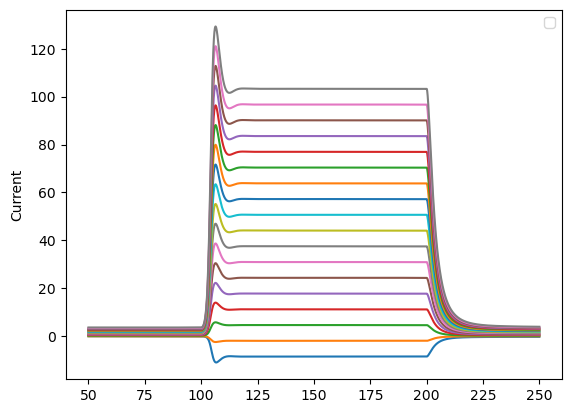

In [10]:
import scipy as sp
import numpy as np
import pylab as plt
from scipy.integrate import odeint
import pandas as pd
class HodgkinHuxley_partial():
    """Full Hodgkin-Huxley Model implemented in Python"""

    C_m  =   1.0
    """membrane capacitance, in uF/cm^2"""

    g_K  =  36.0
    """Postassium (K) maximum conductances, in mS/cm^2"""

    g_L  =   0.3
    """Leak maximum conductances, in mS/cm^2"""

    E_K  = -77.0
    """Postassium (K) Nernst reversal potentials, in mV"""

    E_L  = -54.387
    """Leak Nernst reversal potentials, in mV"""

    t = np.arange(0.0, 250, 0.01)
    """ The time to integrate over """

    def alpha_n(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 0.01*(V+55.0)/(1.0 - np.exp(-(V+55.0) / 10.0))

    def beta_n(self, V):
        """Channel gating kinetics. Functions of membrane voltage"""
        return 0.125*np.exp(-(V+65) / 80.0)

    def I_K(self, V, n):
        """
        Membrane current (in uA/cm^2)
        Potassium (K = element name)

        |  :param V:
        |  :param h:
        |  :return:
        """
        return self.g_K  * n**4 * (V - self.E_K)

    #  Leak
    def I_L(self, V):
        """
        Membrane current (in uA/cm^2)
        Leak

        |  :param V:
        |  :param h:
        |  :return:
        """
        return self.g_L * (V - self.E_L)

    def I_inj(self, t): ####################################################################
        """
        External Current

        |  :param t: time
        |  :return: step up to 10 uA/cm^2 at t>100
        |           step down to 0 uA/cm^2 at t>200
        |           step up to 35 uA/cm^2 at t>300
        |           step down to 0 uA/cm^2 at t>400
        """
        x = 10*(t>100) - 10*(t>200)
        return x

    @staticmethod
    def dALLdt(X, t, self):
        """
        Integrate

        |  :param X:
        |  :param t:
        |  :return: calculate membrane potential & activation variables
        """
        V, n = X
        dVdt = (self.I_inj(t) - self.I_K(V, n)) / self.C_m
        dndt = self.alpha_n(V)*(1.0-n) - self.beta_n(V)*n
        return dVdt, dndt

    def Main(self):
        """
        Main demo for the Hodgkin Huxley neuron model
        """
        def calc_one(V):
            X = odeint(self.dALLdt, [V, 0.32], self.t, args=(self,))
            return  X

        V_ARR = [-90, -80, -70, -60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60, 70, 80]
        df = pd.DataFrame()
        for v in V_ARR:
            volt = calc_one(v)[:,0] ####################################
            n = calc_one(v)[:,1]
            ik = self.I_K(v, n)
            df[f'{v}'] = ik[5000:]
            #il = self.I_L(V)

        plt.plot(self.t[5000:], df)
        #plt.plot(self.t, il, 'm', label='$I_{L}$')
        plt.ylabel('Current')
        plt.legend()
        plt.show()

if __name__ == '__main__':
    runner = HodgkinHuxley_partial()
    runner.Main()